## exercise 1
-  make a graph of top 10 Data analyst skills and top 10 most in demand skills in a plot subpolts(2, 1) bar graph.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

df = pd.read_csv('C:/Users/Ian/Desktop/panda ex/newdata_jobs4.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x))


In [3]:
job_title = 'Data Analyst'
df_DA = df[(df['job_title_short'] == job_title) & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA.dropna(subset=['salary_year_avg'], inplace=True)

In [5]:
df_DA = df_DA.explode('job_skills')

In [6]:
df_DA.dropna(subset=['job_skills'], inplace=True)

In [7]:
df_hypay_skills = (df_DA.groupby('job_skills')
                   .agg(median_salary = ('salary_year_avg','median'))
                   .sort_values(by='median_salary',ascending=False).head(10))

In [8]:
top_demand_skills = df_DA.groupby('job_skills').size().sort_values(ascending=False).head(10).index.tolist()
df_DA_indemand = df_DA[df_DA['job_skills'].isin(top_demand_skills)]
df_DA_indemand = df_DA_indemand.groupby('job_skills').agg(median_salary=('salary_year_avg','median')).sort_values(by='median_salary', ascending=False)

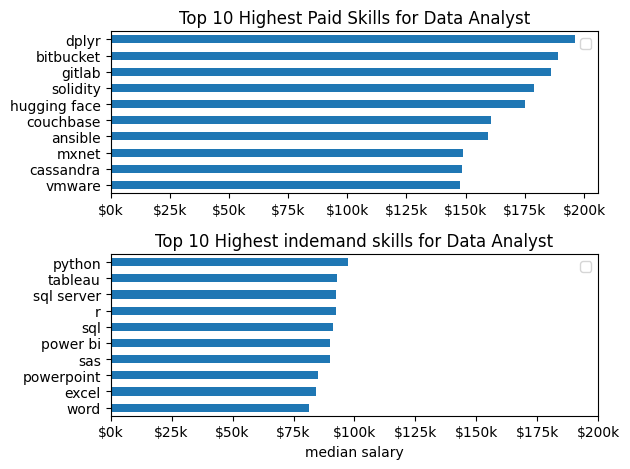

In [9]:
# ploting
fig, ax = plt.subplots(2, 1)
df_hypay_skills.plot(kind='barh', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
df_DA_indemand.plot(kind='barh', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Highest indemand skills for Data Analyst')
ax[1].set_xlim(0, 200000)
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary')
ax[1].legend('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
fig.tight_layout()

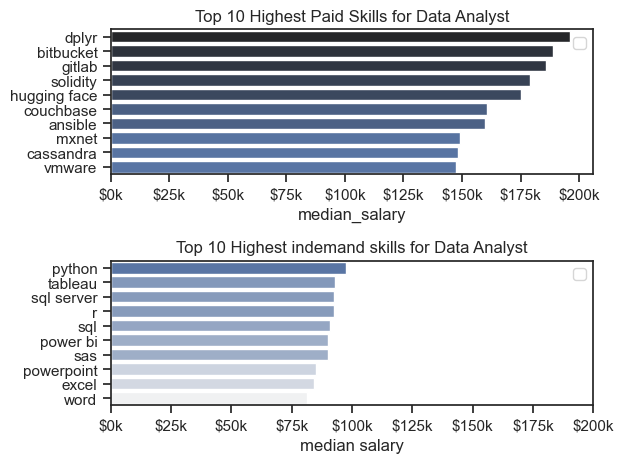

In [17]:
# ploting using seaborn
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')
sns.barplot(data=df_hypay_skills, x='median_salary', y='job_skills', ax=ax[0], hue='median_salary', palette="dark:b_r")
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
sns.barplot(data=df_DA_indemand, x='median_salary', y='job_skills', ax=ax[1], hue='median_salary', palette="light:b")
ax[1].set_title('Top 10 Highest indemand skills for Data Analyst')
ax[1].set_xlim(0, 200000)
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary')
ax[1].legend('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
fig.tight_layout()


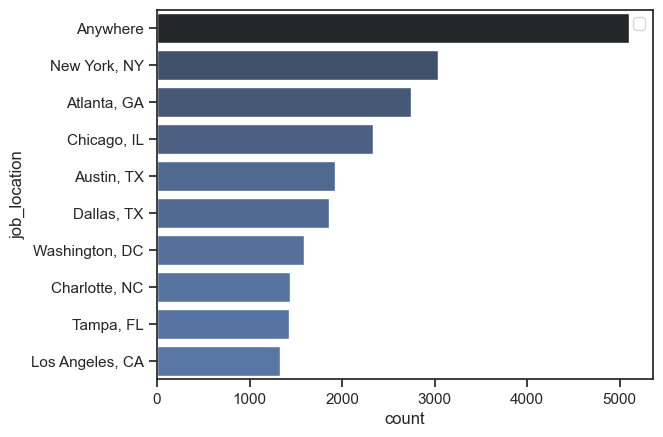

In [18]:
df_DA_us = df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]
df_DA_us_plot = df_DA_us['job_location'].value_counts().to_frame().head(10)
sns.barplot(data=df_DA_us_plot, x='count', y='job_location', hue='count', palette="dark:b_r")
plt.legend('')


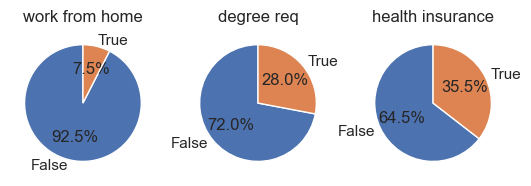

In [19]:
fig, ax = plt.subplots(1, 3)
dict_skills = {
    'job_work_from_home':'work from home',
    'job_no_degree_mention':'degree req',
    'job_health_insurance':'health insurance'
}
for i, (column, title) in enumerate (dict_skills.items()):
    df_pieplot = df_DA_us[column].value_counts()
    df_pieplot.plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%', title=title)
    ax[i].set_ylabel('')

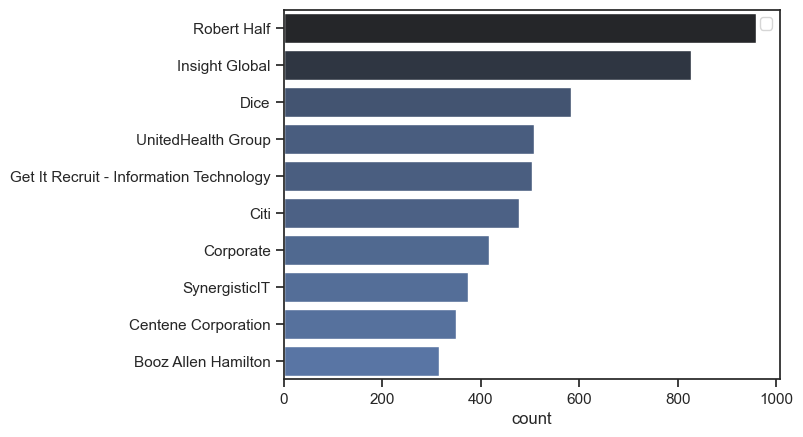

In [21]:
df_DA_us = df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]
df_DA_us_plot = df_DA_us['company_name'].value_counts().to_frame().head(10)
sns.barplot(data=df_DA_us_plot, x='count', y='company_name', hue='count', palette="dark:b_r")
plt.ylabel('')
plt.legend('')

Adding percentages

In [146]:
df_us = df[df['job_country'] == 'United States']
df_us_exp = df_us.explode(column='job_skills')
top_jobs = df_us['job_title_short'].value_counts().sort_values(ascending=False).head(3).index.tolist()

In [147]:
df_us_job_counts = df_us['job_title_short'].value_counts().sort_values(ascending=False)
df_us_job_counts = df_us_job_counts.reset_index(name='job_count')
df_us_job_counts

,job_title_short,job_count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [148]:
df_us_skillcount = df_us_exp.groupby(by=['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_us_plot = df_us_skillcount.merge(df_us_job_counts, on='job_title_short')
df_us_plot = df_us_plot.sort_values(by='skill_count', ascending=False)
df_us_plot['percentage']=df_us_plot['skill_count']/df_us_plot['job_count'] *100
df_us_plot


,job_title_short,job_skills,skill_count,job_count,percentage
886,Data Scientist,python,42379,58830,72.036376
472,Data Analyst,sql,34452,67816,50.802171
921,Data Scientist,sql,30034,58830,51.052184
351,Data Analyst,excel,27519,67816,40.578919
890,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1350,Senior Data Engineer,elixir,1,9289,0.010765
1819,Software Engineer,sass,1,1814,0.055127
487,Data Analyst,theano,1,67816,0.001475
1847,Software Engineer,theano,1,1814,0.055127


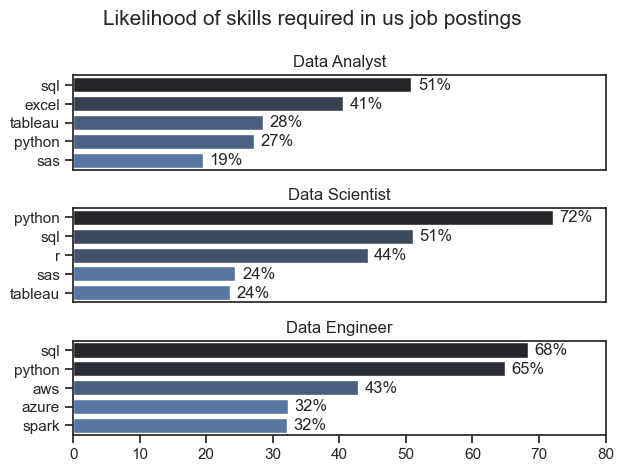

In [172]:
fig, ax = plt.subplots(3, 1)
for i, job in enumerate(top_jobs):
    df_plot = df_us_plot[df_us_plot['job_title_short']==job].head()
    sns.barplot(data=df_plot, x='percentage', y='job_skills', hue='percentage',ax=ax[i], palette='dark:b_r', legend=False)
    ax[i].set_title(job)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 80)
    fig.suptitle('Likelihood of skills required in us job postings', fontsize='15')
    fig.tight_layout()
    for ind, value in enumerate(df_plot['percentage']):
        ax[i].text(value +1 , ind, f'{value:.0f}%', va='center')
    if i != len(top_jobs)-1:
        ax[i].set_xticks([])

In [173]:
df.dropna(subset=['salary_rate'])

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"[gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
43,Senior Data Engineer,Sr SQL Database Engineer with Data Warehouse /...,NaN,via LinkedIn,Contractor,False,"Texas, United States",2023-09-13 13:06:55,True,False,United States,hour,NaN,97.5,Phaxis,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
51,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-21 13:09:39,False,False,United States,hour,NaN,72.5,Aditi Consulting,"[python, java, aws, databricks, spark]","{'cloud': ['aws', 'databricks'], 'libraries': ..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",NaN,NaN
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"[python, hadoop, spark, airflow, kubernetes]","{'libraries': ['hadoop', 'spark', 'airflow'], ..."
